In [1]:
import matplotlib.pyplot as plot
import numpy

from sklearn import neighbors

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

In [2]:
# load a shared dataset
mnist = fetch_openml('mnist_784')

In [3]:
# check data dataframe shape (image number, pixel number)
mnist.data.shape

(70000, 784)

In [4]:
# number of annotations
mnist.target.shape

(70000,)

In [5]:
position = 3

# check data at position
mnist.data.iloc[position]

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 3, Length: 784, dtype: float64

In [6]:
# check annotation of image at position
mnist.target.iloc[position]

'1'

In [7]:
sample_indexes = numpy.random.randint(
    # Any number between 0 and 70000
    70000,
    # return exactly 5000 randomly generated numbers
    size=5000
)

len(sample_indexes)

5000

In [8]:
sample = {
    'data': mnist.data.iloc[sample_indexes],
    'target': mnist.target.iloc[sample_indexes]
}

sample['data'].shape

(5000, 784)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(
    sample['data'], 
    sample['target'],
    train_size=0.8
)

In [10]:
# Create a KNN model with k = 3
model = neighbors.KNeighborsClassifier(
    n_neighbors=3
)

In [11]:
# train the KNN model
model.fit(
    x_train, 
    y_train
)

KNeighborsClassifier(n_neighbors=3)

In [12]:
sample_element = [ 
    x_test.iloc[3]
]

In [13]:
# from a pixel vector to an image matrix
image = numpy.reshape(
    sample_element, 
    (
        28,
        28
    )
)

numpy.matrix(
    image
)

matrix([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,  63., 176., 253., 253., 237., 113.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,

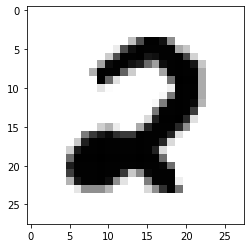

In [14]:
plot.imshow(
    image, 
    cmap=plot.cm.gray_r,
    # interpolation="nearest"
)
plot.show()

In [15]:
model.predict(sample_element)

/home/etud/Bureau/code/python/mloc-env/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/etud/Bureau/code/python/mloc-env/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['2'], dtype=object)

In [16]:
# compute the percentage of error made
score = 1 - model.score(
    x_test,
    y_test
)

/home/etud/Bureau/code/python/mloc-env/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [17]:
print(score)

0.08199999999999996


In [18]:
"""
For few k value, check which is scoring the best
takes no param returns nothing too
draw a graph
"""
errors = []

# The min and max k value, we want to check the score for
k = {
    'min': 2,
    'max': 15 
}

for k in range(k['min'],k['max']):
    model = neighbors.KNeighborsClassifier(
        n_neighbors=k
    )

    model.fit(x_train, y_train)

    score = 1 - model.score(x_test, y_test)

    errors.append(
        # formula to compute the error score percentage
        100 * score
    )

/home/etud/Bureau/code/python/mloc-env/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/etud/Bureau/code/python/mloc-env/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/etud/Bureau/code/python/mloc-env/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/etud/Bureau/code/python/mloc-env/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/etud/Bureau/code/python/mloc-env/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifi

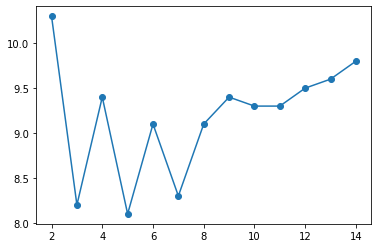

In [19]:
plot.plot(
    range(2,15),
    errors,
    'o-'
)

plot.show()